In [1]:
import torch

In [5]:
use_gpu = False
if torch.cuda.is_available:
    print("We're using a", torch.cuda.get_device_name())
    use_gpu = True
else:
    print("We're using a CPU")

We're using a GeForce RTX 3080


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

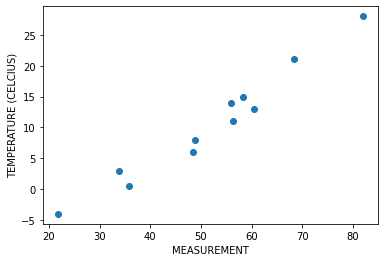

In [12]:
#visualize the data
plt.plot(t_u, t_c, 'o')
plt.xlabel("MEASUREMENT")
plt.ylabel("TEMPERATURE (CELCIUS)")
plt.show()

In [13]:
def model(t_u, w, b):
    return w * t_u + b

In [14]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [15]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [16]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [17]:
#imitate gradient descent
delta = 0.1

loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - 
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [18]:
lr = 1e-2
w = w - lr * loss_rate_of_change_w

In [20]:
loss_rate_of_change_b = \
(loss_fn(model(t_u, w, b + delta), t_c) -
loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
b = b - lr * loss_rate_of_change_b

In [21]:
w

tensor(-44.1730)

In [22]:
b

tensor(46.)

In [23]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [25]:
def dmodel_dw(t_u, w, b):
    return t_u

In [26]:
def dmodel_db(t_u, w, b):
    return 1.0

In [27]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])  # <1>